<h1>Исследование популярности компьютерных игр</h1>

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

**Описание данных:**

    - Name — название игры
    - Platform — платформа
    - Year_of_Release — год выпуска
    - Genre — жанр игры
    - NA_sales — продажи в Северной Америке (миллионы проданных копий)
    - EU_sales — продажи в Европе (миллионы проданных копий)
    - JP_sales — продажи в Японии (миллионы проданных копий)
    - Other_sales — продажи в других странах (миллионы проданных копий)
    - Critic_Score — оценка критиков (максимум 100)
    - User_Score — оценка пользователей (максимум 10)
    - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План работы:** первым делм мы ознакомимся с данными, подготовим их: предобработаем и добавим еще один столбец, затем мы проведем исследовательский анализ данных: определим актуальный период для дальнейшего исследования, ответим на вопросы, далее мы составим портреты пользователей различных регионов, проверим пару гипотез и завершим работу написанием общих выводов.

<h3>Оглавление</h3>

1. [Шаг 1: Первичный обзор данных, получение общей информации о данных](#start)   
2. [Шаг 2: Подготовка данных](#prepare)   
    * [Предобработка данных: изменение типов данных и работа с ошибками](#preproc)   
    * [Добавление новой информации](#adding)     
3. [Шаг 3: Исследовательский анализ данных](#research)
    * [Определение актуального периода](#actual)
    * [Ответы на вопросы](#quest) 
4. [Шаг 4: Составление портретов пользователей различных регионов](#port)
4. [Шаг 5: Проверка гипотез](#hypo)
5. [Шаг 6: Общие выводы](#conq)

<h3> Шаг 1: Первичный обзор данных, получение общей информации о данных </h3>
<a id='start'></a>

Первым делом импортируем библиотеки, которые нам потребуются.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Сохраним наш датасет в переменную.

In [2]:
games = pd.read_csv('/datasets/games.csv')

Вызовем метод info, чтобы просмотреть общую информацию о таблице, а также взглянем на первый десять строк нашего датафрейма.

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сделаем выводы по увиденному.

Наша таблица состоит из 11 столбцов, содержит в себе 16715 строк. В 6 столбцах из 11 у нас есть пропущенные значения в явном виде - NaN'ы. При этом в 3 столбцах таких значений специального типа не так много, а вот в оставшихся - они составляют больше трети от всех значений поля. Также в глаза бросается неудобное наименование столбцов - названия начинаются с большой буквы. Можно заметить несоответствие типов данных столбцов семантике вопросов, на которые они отвечают: так, колонка Year_of_Release, хранящая информацию о годе релиза игры, имеет тип данных float, а столбец с, казалось бы, численной оценкой игры от пользователей - тип object. 

**Вывод по Шагу 1:** итак, на данном шаге мы ознакомились с полученными нами данными - таблицей, просмотрели общую информацию о ней и взглянули на первые строки, в процессе уже были выявлены первые проблемы в данных, самые очевидные. На следующем шаге мы исправим их, а также копнем глубже для поиска неявных недостатков.

<h3>Шаг 2: Подготовка данных</h3>
<a id='prepare'></a>

На данном этапе наша работа состоит в двух пунктах: предобработке данных и добавлении новой информации, необходимой для дальнейшего исследования. Начнем с первого.

<h3>Предобработка данных</h3>
<a id='preproc'></a>

На данном этапе нам предстоит привести нашу таблицу к должному виду: разобраться со всеми проблемами в данных. Это необходимо, поскольку, только обрабатывая корректные данные, мы можем получить корректный результат.

На предыдущем Шаге мы уже обратили наше внимание на моменты, которые необходимо исправить. Также в процессе работы мы рассмотрим таблицу на предмет наличия других ошибок. Начнем нашу работу с исправления названий столбцов, затем займемся пропусками, а после - заменой типов данных.

**Замена названий столбцов**

Посмотрим еще раз на названия наших полей.

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Объективно, с такими названиями не очень удобно работать. Создадим список с новыми и поменяем имена столбцов.

In [6]:
new_names = []
for i in games.columns:
    new_names.append(i.lower())
games.set_axis(new_names, axis='columns')

C:\Users\Acer\anaconda3\envs\practicum\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  after removing the cwd from sys.path.


Проверим, что получилось.

In [7]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все отлично, можем переходить к следующему вопросу.

**Обработка пропусков**

Как было выяснено ранее - у нас присутствуют пропуски в явном виде. Разберемся с ними в первую очередь.

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на строки с пропусков в столбце name.

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games = games.drop(games[games['name'].isna()].index).reset_index(drop=True)

Таких строки у нас две. Эти же строки имеют и пропуски в genre  и трех других столбцах. Очевидно, такие данные непригодны для дальнейшей работы. Удалим строки. Пропущенные значения в столбце name могли появиться из-за некорректного распознания символов наименования и жанра - допустим, было указано на другом языке. 

Далее будем пользоваться интересным свойством компьютерных игр: одну и ту же игру выпускают на разные платформы. Так, зная год выпуска игры X на одну платформу (или несколько платформ), мы можем предположить, что игра X на другую платформу была выпущена в тот же год. Даже если года не совпадают, вероятность большой разницы между ними мала.

Пользуясь обозначенным выше свойством, заполним пропуски в столбце year_of_release везде, где это возможно. Зафиксируем количество пропусков ДО и ПОСЛЕ.

In [11]:
games[games['year_of_release'].isna()].shape[0]

269

In [12]:
target_index_1 = games[games['year_of_release'].isna()].index
for i in target_index_1:
    target_name_1 = games.loc[i, 'name']
    target_frame_1 = games[(games['name'] == target_name_1) & (~ games['year_of_release'].isna())].reset_index(drop=True)
    if target_frame_1.shape[0] != 0: 
        games.loc[i, 'year_of_release'] = target_frame_1.loc[0, 'year_of_release']

In [13]:
games[games['year_of_release'].isna()].shape[0]

146

Итак, пропущенных значений стало меньше.

Посмотрим, какой процент от всего датафрейма составляют строки с пропусками в этом поле.

In [14]:
str(round(games[games['year_of_release'].isna()].shape[0] / games.shape[0] * 100, 2)) + '%'

'0.87%'

Меньше одного процента. Учитывая этот факт и факт того, что, год выпуска игры играет ощутимую роль в нашем исследовании, мы примем решение удалить такие строки. Откуда могли взяться эти пропущенные значения? Как вариант, данные собирались с разных источников, и один из них не предоставлял по каким-то причинам год выпуска игры, или технические проблемы. Интерпретировать отсутствие информации в данной колонке как значение 'ноль' или факт того, что данных не существует, мы не можем.

In [15]:
games = games.dropna(subset = ['year_of_release']).reset_index(drop=True)

Итак, у нас остались пропущенные значения в крайних трех столбцах. Все, что мы знаем - их много. 

Разберемся с природой этих пропусков. Если приложить немного усилий и поискать, откуда можно взять рейтинги, можно наткнуться на сайт, содержащий массу оценок - и критиков и пользователей, а  также рейтинг esrb. Выберем строки с отсутствующими значениями и посмотрим, что мы там найдем. Есть ли оценки? Есть, к слову, тенденция у наших пропусков появляться сразу втроем, что слегка заметно по просмотру первых 10 строк. Поэтому будем ориентироваться по столбцу user_score.

In [16]:
games[games['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Первое, что видим - подавляющая часть игр из этих десяти были выпущены относительно давно. Посмотрим отдельно на строки с year_of_release до 2005 и после.

In [17]:
games[(games['user_score'].isna()) & (games['year_of_release'] >2005)].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
83,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN
86,Mario & Sonic at the Olympic Games,Wii,2007.0,Sports,2.57,3.86,0.66,0.91,NaN,NaN,NaN
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN


Мини-исследование показало очень интересный момент: итак, игра с индексом 31 в нашей таблице именуется как Call of Duty: Black Ops 3, в то время как на сайте с оценками она называется Call of Duty: Black Ops III. Получаем первую причину пропусков - вероятно, данные о названиях игр, платформах, жанрах, годах выпуска и продажах собирались в одном (или тоже нескольких, но более согласованных) источнике, а информация о рейтингах - в другом, и получилась ситуация: названия игр не сошлись, поэтому системой, cобиравшей информацию, было принято, что данные о рейтингах игры отсутствуют. Посмотрим, что там с покемонами.

У нас много названий игр про покемонов, содержащих в себе символ '/', например "Pokemon X/Pokemon Y", так вот - на сайте игры Pokemon X и Pokemon Y находятся на разных страницах. Опять же - несоответствие названий. Аналогичное подтвердилось и для других игр из наших 10, что мы увидели в результате работы метода.

Посмотрим на игры, выпущенные давно. 

In [18]:
games[(games['user_score'].isna()) & (games['year_of_release'] < 2005)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN


Для некоторых из этих игр просто нет странички - т.е. выпущены настолько давно, что сейчас уровень внимания к ним настолько низок, что для них нет надобности, по мнению людей, ведущих такого рода учет, оценивать их.

Сделаем промежуточный вывод: мы нашли объяснения отсутствию в некоторых строках одновременно значений в этих трех полях - это неудачные попытки взять информацию с сайта с оценками, неудачные - потому что имена игр написаны были по-разному, или игры не имели своей странички. Теперь вопрос - как получились строки, где отсутствует значение только в одном из этих трех столбцов? Посмотрим на них.

In [19]:
games[(games['user_score'].isna()) & (
    ~games['critic_score'].isna()) & (
    ~games['rating'].isna())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.00,0.13,88.0,NaN,E
635,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.00,0.10,83.0,NaN,E
1971,Monster Rancher 2,PS,1998.0,Simulation,0.19,0.13,0.66,0.07,83.0,NaN,E
3796,The Grinch,PS,1999.0,Adventure,0.29,0.20,0.00,0.03,55.0,NaN,E


Обращение к источнику с запросами об этих играх показало, что страницы данных игр существуют и, очевидно, их названия в таблице и на сайте совпадают, но значение user_score (оценка пользователей) там отсутствует.

In [20]:
games[(~games['user_score'].isna()) & (
    games['critic_score'].isna()) & (
    ~games['rating'].isna())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E


Аналогично предыдущему случаю. Видимо, эти игры совсем непопулярные, поэтому и отзывов критиков нет.

In [21]:
games[(~games['user_score'].isna()) & (
    ~games['critic_score'].isna()) & (
    games['rating'].isna())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
817,R4: Ridge Racer Type 4,PS,1998.0,Racing,0.68,0.46,0.79,0.13,88.0,9.2,NaN
1754,Football Manager 2013,PC,2012.0,Sports,0.00,0.95,0.00,0.21,86.0,6.7,NaN
2042,Monster Rancher,PS,1997.0,Simulation,0.12,0.08,0.74,0.07,86.0,8.3,NaN
3037,100 Classic Books,DS,2008.0,Misc,0.12,0.52,0.00,0.02,70.0,6,NaN
4192,Football Manager 2015,PC,2014.0,Simulation,0.00,0.44,0.00,0.03,80.0,6,NaN


Опять же, странички есть - рейтинг не указан. Но тут возможен еще такой вариант - получать оценку от esrb игры не обязаны, так что возможно, что ее просто не существует. 

Также в столбце user_score у нас есть значение tbd, что можно расшифровать как to be determined - т.е., не установлен, по факту - отсутствует. Такие значения ставят, если отзывов недостаточно для корректной оценки. Посмотрим на строки с такими значениями.

In [22]:
games.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
519,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
643,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
714,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Оценки пользователей для таких значений действительно нет. По факту - это те же пропуски, но в виде последовательности символов, а не специального значения NaN.

Более важный вопрос - что нам с этим всем делать? Будем думать о NaN'ах и tbd-значениях как об одной субстанции. Рассмотрим варианты. Первый - удалить. Тут сразу нет, очевидно, так нам придется избавиться от половины наших записей (вспоминаем результаты работы метода info); Второй - заметить правильными, фактическими значениями. Ну тут два момента: во-первых, заполнить мы сможем не все, а только сгладить там, где произошла ошибка из-за разных наименований, во-вторых, делать это придется вручную; Третий - заменить средними/медианами. Рассмотрим подробнее такой вариант. Для замены, нам необходим фактор, определенный для всех строк, и от которого напрямую зависят оценки и рейтинг. Год выпуска, платформа и продажи - сразу мимо. Что с жанром? Мы можем сгруппировать таблицу и посмотреть среднюю, например, оценку для каждого жанра и заполнить этим значением. Если мы выясним, что в среднем игры одного жанра получают оценку выше, это вовсе не значит, что мы можем брать игры этого жанра и присваивать им оценку выше. Игра может быть совсем никудышной или легендарной. Понятие жанр игры слишком обобщающее для таких вычислений. Нам бы подошло в качестве такого параметра сочетание, например, жанр игры + компания-производитель; Четвертый - заменить нулями (условными - для rating), но так у нас будут некорректные медианы и средние для столбцов с очками, а вот для rating такой вариант может вполне подойти; Пятый - оставить как есть. Вот так мы и поступим относительно critic_score и user_score, ибо все остальные варианты, как показано, дадут нежелательный эффект. Tbd мы заменим на NaN, чтобы получить возможность поменять тип данных столбца. 

In [23]:
games['rating'] = games['rating'].fillna('undefined')

In [24]:
target_index_1 = games[games['user_score'] == "tbd"].index
for i in target_index_1:
    games.loc[i, 'user_score'] = np.nan

Итак, отсутствующие значения в данных столбцах сигнализируют в части случаев о действительном отсутствии информации и еще в части - являются результатом некорректного сбора информации. 

Перейдем к следующему вопросу.

**Замена типов данных**

Вызовем еще раз метод info.

In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null float64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null object
rating             16567 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поменяем типы данных столбцов: year_of_release: float -> int; user_score: object -> int.

In [26]:
games['year_of_release'] = games['year_of_release'].astype('int64')
games['user_score'] = games['user_score'].astype('float64')

<h3>Добавление новой информации</h3>
<a id='adding'></a>

В данном пункте нам необходимо для дальнейшего исследования добавить в нашу таблицу столбец с суммарными продажами по всем регионам. Сделаем это.

In [27]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']

**Вывод по Шагу 2**: мы привели наши данные к лучшему виду: поменяли названия столбцов, удалили часть пропущенных значений, разобрались с природой остальных - тех, что не удалили, поменяли типы данных, а также добавили столбец с дополнительной информацией. Теперь может приступать к основной работе.

<h3>Шаг 3: Исследовательский анализ данных</h3>
<a id='research'></a>

На данном шаге необходимо провести весьма объемную работу: ответить на ряд вопросов. Начнем с определения актуального периода (а точнее, с ответов на вопросы, которые помогут его установить) для дальнейшей работы с ним, затем будем заниматься непосредственным предметом нашего исследования: дадим некоторые ответы.

<h3>Определение актуального периода</h3>
<a id='actual'></a>

Для обозначения актуального периода первым делом посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все годы?

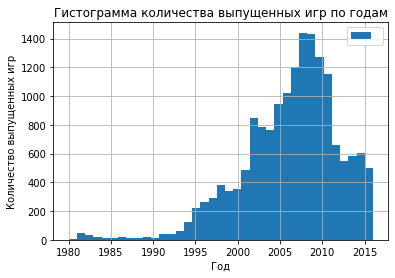

In [28]:
games.plot(kind='hist', y='year_of_release', grid=True, label = '', bins=37)
plt.title('Гистограмма количества выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

Итак, как мы видим, пик графика приходится на 2008-2009 годы, видимо, игровая индустрия находилась в своем расцвете  в это время. Казалось бы, с прогрессом средств по созданию игр и компьютерных программ вообще, должно было выпускаться больше игр, но это не так - с 2012 года их выпускается меньше, чем было в года, начиная с 2002. Подумаем, как можно это объяснить. Как вариант - игры обрели популярность в 2005-2011 годы - стали распространены среди средних потребителей, затем, общий ажиотаж спал, и порождать спрос на игры стали только истинные ценители. Если это верно, получаем следствие - игры стали более направленными на кого-то конкретного, более специфичными, даже если и нет, факт того, что именно в 2012 год индустрия приняла вид такой, какой имеет и сейчас, дает право отсечь границу актуального периода по 2012 или выше. 

Также важный параметр в вопросе определения актуального периода - здравый смысл. Если бы мы увидели, что спад - переход на более специфичный и малый выпуск - начинается с 1989 года, мы бы не смогли написать 'дает право отсечь актуальный период по 1989 году' (могли бы в случае, если бы индустрия была более стабильной). Но 2012 - не так давно. Но у свежести есть и минус - нам придется не рассматривать большую часть нашего датафрейма - данные за 2005-2011, кои составляют основной объем. Чем более узкий и недавний период мы берем, тем больше данных мы теряем. Но, естественно, важны данные не за все периоды. Разберемся получше, как стоит поступить.

Посмотрим, как менялись продажи по платформам. Выберем несколько (7) с наибольшими продажами и построим распределение продаж по годам для каждой платформы. Рассмотрим вопрос - за какой характерный срок появляются новые и исчезают старые платформы, это поможет определить актуальный период.

In [29]:
platforms = games.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(7)

Напишем функцию, чтобы автоматизировать построение графиков.

In [30]:
def platform_plot(data, name):
    target = data.query('platform == @name').groupby('year_of_release')['all_sales'].sum()
    target.plot(y= 'all_sales', x='year_of_release', grid=True, label = '',
                style='o-')
    plt.title('График распределения общих продаж по годам для платформы: ' + name)
    plt.xlabel('Год')
    plt.ylabel('Продажи (млн)')
    plt.show()

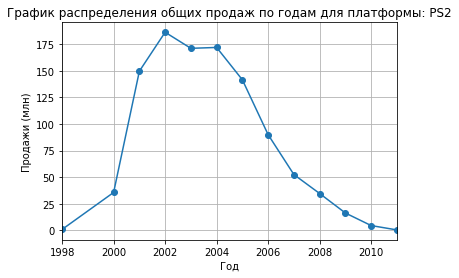

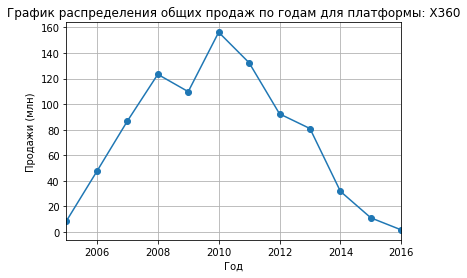

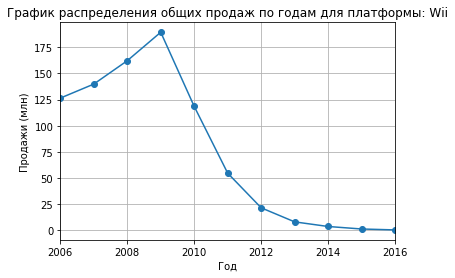

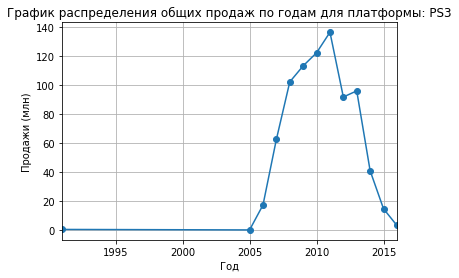

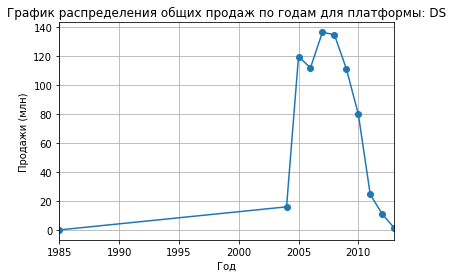

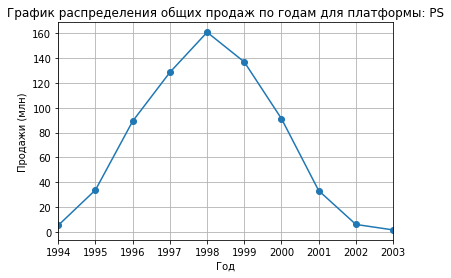

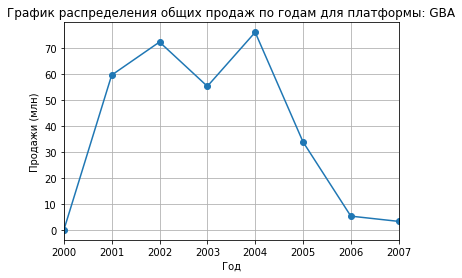

In [31]:
for i in platforms.index:
    platform_plot(games, i)

Так, мы построили графики для семи платформ. По графикам можно сказать: в среднем за пару лет платформы начинают набирать за год минимум половину от своих максимальных годовых продаж. То есть: период становления актуальной для платформы можно назвать именно таким. Теряет же свою популярность платформа в среднем не так быстро: это занимает около трех лет. Все остальное время (около 5-6 лет) платформа является актуальной. 

Мы не можем рассматривать период актуальности более семи лет, так как платформы, использованные 7 лет назад (2 года на становление плюс 5 на существование), уже не актуальны точно. А вот с платформами, которые фигурировали 6 лет назад (а лучше 5) , есть шанс попасть туда, куда надо.

**Промежуточный вывод**: на данном подпункте мы посмотрели общее распределение выпуска игр по годам, а также распределение продаж по годам для некоторых платформ. Возьмем период актуальности с 2012 по 2016 год. 

Создадим новый датафрейм для работы с актуальными данными.

In [32]:
games_actual = games.query('year_of_release >= 2012')

<h3>Ответы на вопросы</h3>
<a id='quest'></a>

Вопрос 1: какие платформы лидируют по продажам, растут или падают? Необходимо выбрать потенциально прибыльные платформы. 

Первым делом посмотрим, сколько у нас вообще платформ в таблице. После отбора актуальной информации, многие из них должны были отсеяться.

In [33]:
platforms_act = games_actual['platform'].unique()

In [34]:
len(platforms_act)

11

Одиннадцать. Не мало. Построим для каждой распределение продаж по годам. По графику можно будет определить: актуальна платформа/неактуальна; растет/падает. 

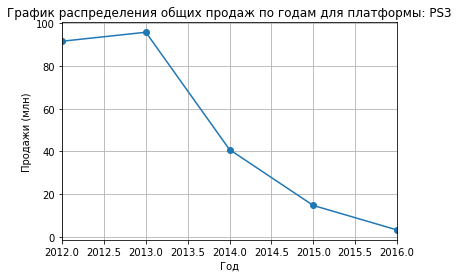

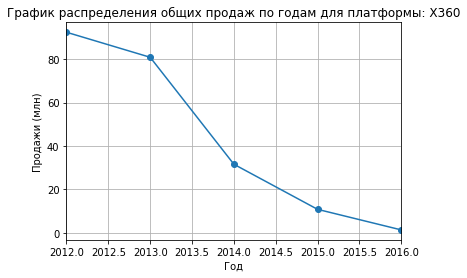

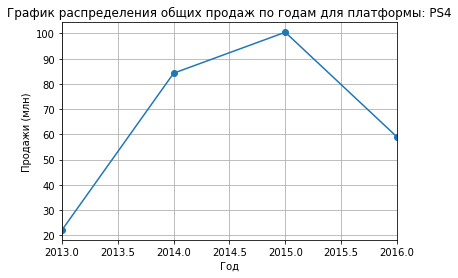

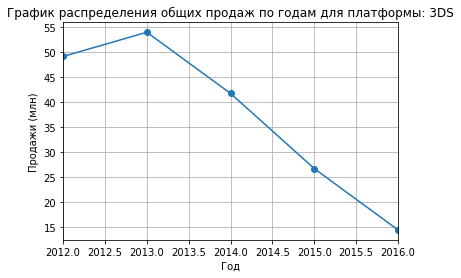

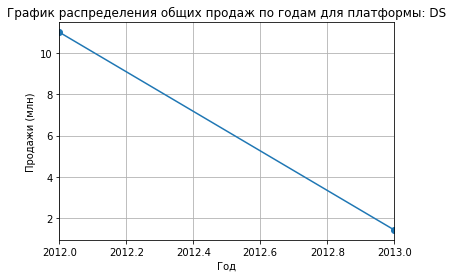

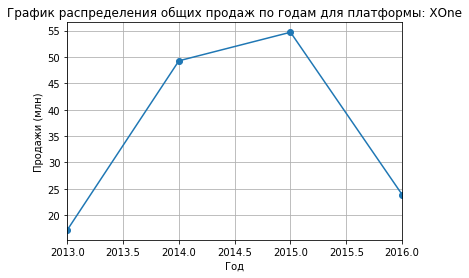

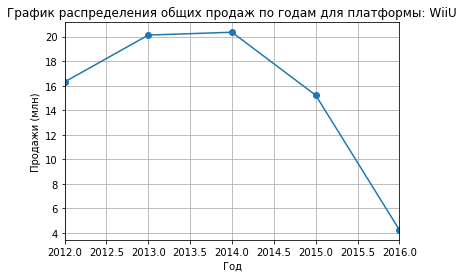

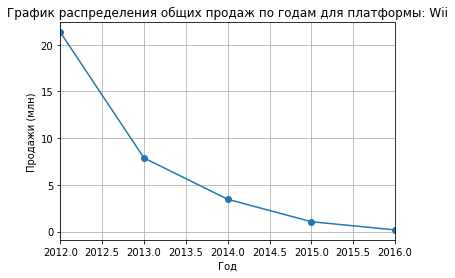

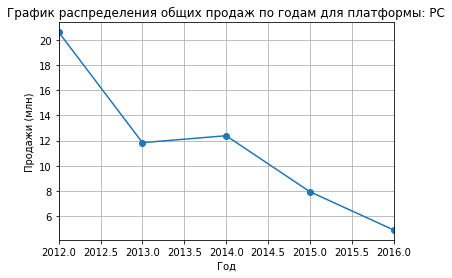

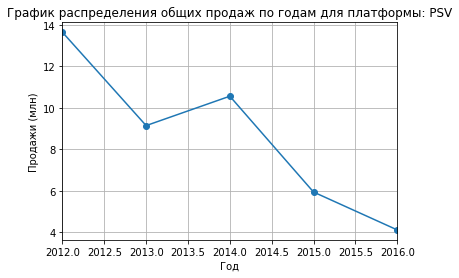

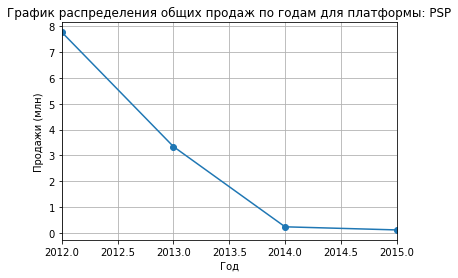

In [35]:
for i in platforms_act:
    platform_plot(games_actual,i)

Как видно на первый взгляд - продажи падают для всех платформ, хотя количество выпускаемых игр в эти года не менялось. Значит, падает спрос на игры. Но в этих условиях в любом случае есть свои лидеры. Охарактеризуем платформы поподробнее, не будем более упоминать DS (последние продажи - 2013 год), PSP (последние продажи - 2015 год) - то есть, уже точно неактуально. Осталось 9.

Соберем в отдельный объект Series данные по платформам за 2016 год: получим рейтинг по количеству продаж для 9 платформ. Это нужно для более показательного вывода по платформам.

In [36]:
sales_2016 = games_actual.query('year_of_release == 2016'
                               ).groupby('platform')['all_sales'].sum()

In [37]:
sales_2016.sort_values(ascending=False)

platform
PS4     59.01
XOne    23.91
3DS     14.50
PC       4.89
WiiU     4.25
PSV      4.10
PS3      3.23
X360     1.40
Wii      0.17
Name: all_sales, dtype: float64

    - PS3: продажи падают уже три года, за 2016 год они составили 3.23 млн. копий, что является 7 из 9 показателем в рейтинге по продажам за 2016 год по платформам, эта платформа явно не является потенциально прибыльной;
    - X360: продажи падают уже 4 года, вообще данная платформа особенна тем, что, она стартовала с больших продаж и с тех пор не может достичь своих же показателей, за 2016 год было продано всего 1.40 млн. копий: 8 из 9 - аналогично PS3 - не является лидером и не обладает потенциалом;
    - PS4: особенность этой платформы  в том, что продажи по ней начались лишь с 2013: из 4 лет ее продажи падают всего год, хотя слово "падают" здесь отображает относительность - в 2015 году было продано больше, а по факту - в 2016 году было продано 59.01 млн копий игр, предназначенных для этой платформы, что больше, чем для всех остальных платформ за этот год. PS4 - лидер по продажам, это потенциально прибыльная платформа, хотя ее продажи и на условном спаде, как минимум на 2017 год можно и нужно делать на нее ставку;
    - 3DS: продажи данной платформы падают уже три года, за 2016 было продано 14.5 млн копий, по количеству распространенных копий за 2016 данная платформа занимает третье место в рейтинге, но настораживает другой факт - среднее время становления платформы неактуальной как раз три года, поэтому велика вероятность, что в следующем году 3DS придет в окончательный упадок, об этом же сигнализирует ярко выраженный линейный характер графика падения продаж игр для данной платформы (после пика), мы не можем считать эту платформу потенциально прибыльной, хотя шансы у нее, безусловно, куда выше, чем у X360 или PS3 в этом вопросе;
    - XOne: также как и PS4 продается с 2013 и в упадке лишь год, за 2016 было продано 23.91 млн копий игр, что занимает второе место в рейтинге, несмотря на сильный упадок продаж за 2016, молодость платформы и численные показатели за 2016 позволяют принять ее, как потенциально прибыльную на 2017 год; 
    - WiiU: платформа в упадке два года, за 2016 было продано 4.25 млн копий - в рейтинге занимает серединное положение, неплохие показатели, но считать платформу потенциально прибыльной было бы опрометчиво; 
    - Wii: продажи падают уже 4 года, а за 2016 они составили всего 0.17 млн копий, точно не наш кандидат; 
    - PC: вот тут уже очень интересная ситуация на графике  - в 2012 пик, затем падение в 2013, прирост в 2014 и опять падение, за 2016 было продано 4.89 млн копий - 4 место из 9, сложно назвать платформу потенциально прибыльной, но опять же, как и с 3DS - это неплохой кандидат с неплохими шансами; 
    - PSV: поведение на графике аналогично PC, за 2016 продано 4.10 млн, ситуация аналогичная PC и 3DS. 

А теперь совсем кратко: точно потенциально прибыльные платформы это PS4 и XOne (собственно, это и есть ответ на вопрос), кандидаты в потенциально прибыльные платформы - те, на которые стоит сделать небольшую ставку (закупить небольшой процент игр и на эти платформы, например) : 3DS, PC, PSV. 

Вопрос 2: описать результат построения графика "ящик с усами" по глобальным продажам в разбивке по платформам. 

Итак, на предыдущем вопросе мы определили две потенциально прибыльных платформы. Построим для них диаграмму размаха, чтобы лучше рассмотреть природу продаж игр, написанных под эти платформы. Опишем диаграммы.

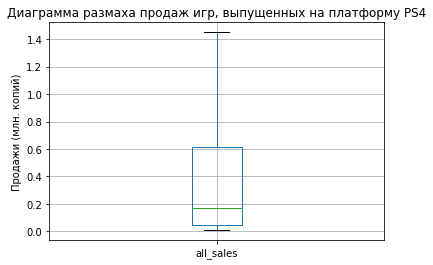

In [38]:
games_actual.query('platform == "PS4"').boxplot('all_sales', showfliers=False)
plt.title('Диаграмма размаха продаж игр, выпущенных на платформу PS4')
plt.ylabel('Продажи (млн. копий)')
plt.show()

In [39]:
games_actual.query('platform == "PS4"')['all_sales'].describe()

count    392.000000
mean       0.678036
std        1.355221
min        0.010000
25%        0.050000
50%        0.170000
75%        0.612500
max       12.250000
Name: all_sales, dtype: float64

Что можно сказать? Медиана сильно далека от максимума (видно по результату работы метода describe и по диаграмме). Половина игр для данной платформы имеет суммарные продажи не более 0.17 млн копий, при этом абсолютный лидер на платформе имеет аж 12.25 млн копий продаж. Разница между средним и медианой 0.51 млн копий (0.17 и 0.68 млн копий), что также объясняется наличием лидеров с большим количеством продаж, так, на диаграмме мы видим две точки после отметки в 10 млн. копий - бестселлеры на платформе. В общем, большая часть игр имеет весьма скромные продажи (относительно), грандиозный успех платформы обеспечивается двумя факторами: 1) небольшим количеством очень успешных игр, 2) большим количеством (у нас 392 игры на платформе - это за 4 года, как помним) весьма стандартных, но не провальных.

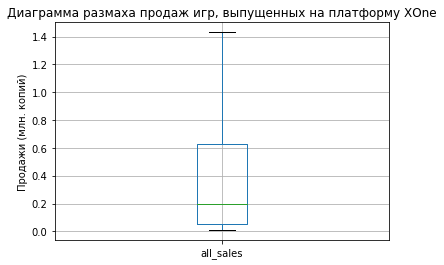

In [40]:
games_actual.query('platform == "XOne"').boxplot('all_sales', showfliers=False)
plt.title('Диаграмма размаха продаж игр, выпущенных на платформу XOne')
plt.ylabel('Продажи (млн. копий)')
plt.show()

In [41]:
games_actual.query('platform == "XOne"')['all_sales'].describe()

count    247.000000
mean       0.587247
std        0.942412
min        0.010000
25%        0.050000
50%        0.200000
75%        0.625000
max        6.710000
Name: all_sales, dtype: float64

Сделаем выводы по диаграмме размаха и для XOne. Первое - медиана и максимальное значение имеют куда меньшую разницу на этой платформе, чем на предыдущей, аналогично и среднее с медианой, соответственно - для данной платформы характерно отсутствие таких масштабных по популярности и продажам игр, как для PS4, но здесь есть свои относительные 'звездочки', которые как и в том случае, тянут среднее вверх. Судя по количеству значений отмеченных над 'ящиком', 'усы' собрали больше значений, чем в аналогичной диаграмме для PS4: здесь меньше выделяющихся значений, все числа более приближенны к средним значениям. Это можно заметить и по размеру четвертого квартиля. 

Вопрос 3: как влияют на продажи внутри популярной платформы отзывы пользователей и критиков.

Популярных платформы у нас две, для каждой посмотрим, как вляют отзывы на продажи. Построим диаграммы рассеяния, посчитаем коэффициенты корреляции, сделаем выводы и сравним. Начнем с PS4.

Посмотрим на взаимосвязь с user_score - оценками зрителей.

In [42]:
round(games_actual.query('platform == "PS4"')['user_score'].corr(games_actual.query('platform == "PS4"')['all_sales']),2)

-0.03

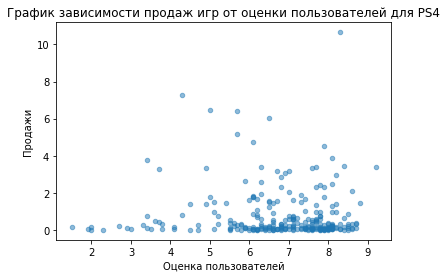

In [43]:
games_actual.query('platform == "PS4"').plot( kind='scatter', x='user_score', y='all_sales'
                                           , alpha=.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('График зависимости продаж игр от оценки пользователей для PS4')
plt.show()

Коэффициент корреляции практически нулевой, отсуствие зависимости можно заметить и по графику.

Посмотрим на взаимосвязь с оценками критиков.

In [44]:
round(games_actual.query('platform == "PS4"')['critic_score'].corr(games_actual.query('platform == "PS4"')['all_sales']),2)

0.41

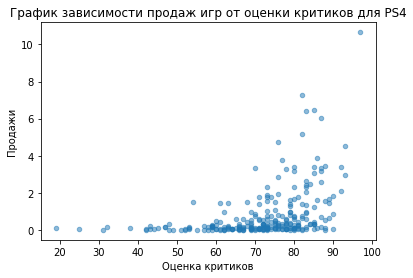

In [45]:
games_actual.query('platform == "PS4"').plot( kind='scatter', x='critic_score', y='all_sales'
                                           , alpha=.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('График зависимости продаж игр от оценки критиков для PS4')
plt.show()

А вот зависимость продаж от оценок критиков уже есть: коэффициент корреляции немаленький плюс по графику заметно, как все игры  с продажами выше среднего кучкуются в области с оценками критиков от 70 и выше.

Итак, вывод по данной платформе: продажи игр, предназначенных для PS4, коррелируют с отзывами критиков и не зависят от оценок пользователей. Как можно это объяснить? Критики оценивают игры более справедливо, более 'правильно', собственно, они и являются профессионалами в этой области, поэтому их оценки так хорошо характеризуют реальное положение вещей, реальный фактор успеха - продажи; пользователи целенаправленно прислушиваются к критикам, поэтому обзоры их в прямом смысле порождают продажи и зависимость.

Посмотрим для XOne.

Начнем с оценок зрителей.

In [46]:
round(games_actual.query('platform == "XOne"')['user_score'].corr(games_actual.query('platform == "XOne"')['all_sales']),2)

-0.07

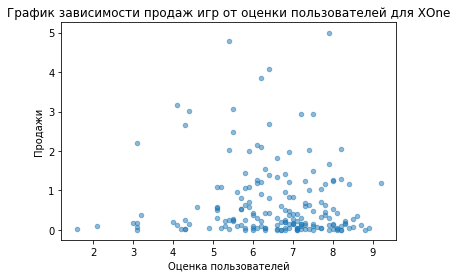

In [47]:
games_actual.query('platform == "XOne"').plot( kind='scatter', x='user_score', y='all_sales'
                                           , alpha=.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('График зависимости продаж игр от оценки пользователей для XOne')
plt.show()

Первое, что отметим по коэффициенту корреляции - по модулю он больше, чем для другой платформы. На графике тоже можно приглядеться и заметить с усилием, крайне слабо прослеживаемую, отрицательную корреляцию. Возникает вопрос: почему так? Разве с ростом оценки в положительную сторону не должны расти и продажи? Посмотрим, что там с оценками критиков.

In [48]:
round(games_actual.query('platform == "XOne"')['critic_score'].corr(games_actual.query('platform == "XOne"')['all_sales']),2)

0.42

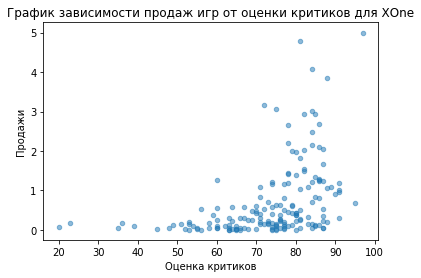

In [49]:
games_actual.query('platform == "XOne"').plot( kind='scatter', x='critic_score', y='all_sales'
                                           , alpha=.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('График зависимости продаж игр от оценки критиков для XOne')
plt.show()

Коэффицент корреляции почти идентичен аналогичному показателю по предыдущей платформе: игры оцененные более высоко имеют большие продажи. Собственно, объяснить это можно также, как и для PS4. 

Сделаем мини-вывод по платформе: он, к слову, практически идентичен выводу по предыдущей платформе (это как факт тоже представляет интерес, конечно, - одинаковые зависимости для всех потенциально прибыльных платформ); продажи игр, созданных для XOne, коррелируют с отзывами критиков и не зависят от оценок пользователей (все-таки, коэф. Пирсона для оценок пользователей и продаж по модулю составляет всего 0.07, хотя его отрицательный знак и вызывает вопросы, но само значение слишком мало, чтобы не игнорировать его). 

Итак, мы получили выводы по каждой из наших потенциально популярных платформ и можем отметить, что они идентичны. Продажи игр, написанных под разные платформы, зависят от одних и тех же факторов.

Вопрос 4: что можно сказать о самых прибыльных жанрах по общему распределению игр по жанрам? Выделяются ли жанры с высокими и низкими продажами?

Для ответа на этот вопрос нам надо установить самые прибыльные и самые менее продаваемые жанры.

In [50]:
genres_top = games_actual.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

In [51]:
genres_top

genre
Action          394.65
Shooter         267.49
Role-Playing    177.97
Sports          158.63
Misc             77.61
Platform         55.42
Racing           47.01
Fighting         40.02
Simulation       32.93
Adventure        26.62
Strategy         12.28
Puzzle            4.67
Name: all_sales, dtype: float64

Теперь построим распределение игр по жанрам.

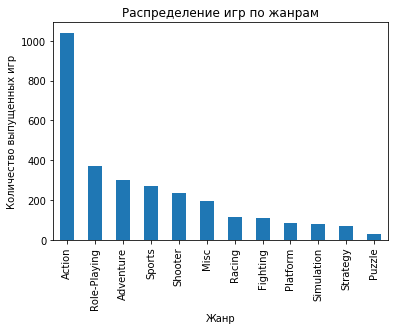

In [52]:
games_actual.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение игр по жанрам')
plt.show()

Сравним распределение с нашим списком.

Больше всего продаж у игр жанра Action, по графику мы видим, что и игр этого жанра было выпущено больше всего. Интересная ситуация с играми жанра Shooter, они занимают второе место в топе по количеству продаж, но по количеству выпущенных игр они лишь на пятом месте. То есть, если высокие продажи игр жанра Action (как и Role-Playing, если говорить о топ-3) можно объяснить количеством выпущенных игр (посмотрим на график, этот столбец явно выделяется), то продажи игр жанра Shooter уже являются следствием не количества игр, а чего-то другого - игры данного жанра очень актуальны. Также интересная позиция у игр жанра Adventure: по продажам они третьи с конца (из 12), а по количеству выпущенных игр - третьи с начала, то есть - выпускают много, покупают мало - жанр не особо популярен. В остальном - график распределения игр по жанрам и топ по количеству проданных копий выглядят согласованно: сколько выпускают, столько и покупают, и наоборот. 

Построим также столбчатую диаграмму, для каждого жанра укажем среднее количество продаж на игру.

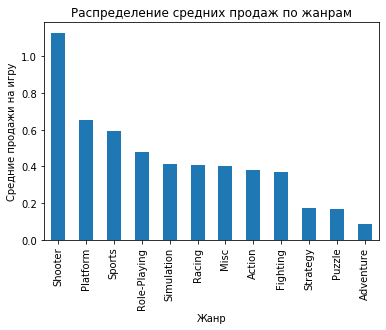

In [53]:
games_actual.groupby('genre')['all_sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи на игру')
plt.title('Распределение средних продаж по жанрам')
plt.show()

**Вывод по Шагу 3**: итак, на данном шаге мы проделали два важных блока работы: определили актуальный период, тем самым обозначив пригодные для анализа данные - с 2012 по 2016 год; ответили на несколько вопросов, в которых заключается наш исследовательский анализ, узнали, какие платформы потенциально прибыльные, какова природа продаж на этих платформах, выяснили, какие жанры продаются лучше всего и от чего зависят продажи сильнее - от отзывов критиков или от отзывов пользователей. 

<h3>Шаг 4: Составление портретов пользователей различных регионов</h3>
<a id='port'></a>

На данном Шаге нам необходимо составить портреты пользователей различных регионов (NA, EU, JP). Для каждого портрета ответить на вопросы: самые популярные платформы (топ-5) и различия в долях продаж; самые популярные жанры (топ-5) и разница между ними; влияет ли рейтинг ESRB на продажи в регионе?

Начнем с платформ. Выделим топ-5 для каждого региона.

In [54]:
for i in ['na', 'jp', 'eu']:
    print('Самые продаваемы платформы в регионе ' + i)
    name_col = i + '_sales'
    print(games_actual.groupby('platform')[name_col].sum().sort_values(ascending=False).head())

Самые продаваемы платформы в регионе na
platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
Name: na_sales, dtype: float64
Самые продаваемы платформы в регионе jp
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64
Самые продаваемы платформы в регионе eu
platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
Name: eu_sales, dtype: float64


А теперь построим график для всех регионов, по оси абсцисс отложим названия платформ, а по оси ординат - количество продаж игр для каждой.

Text(0.5, 1.0, 'Распределение продаж в различных регионах по платформам')

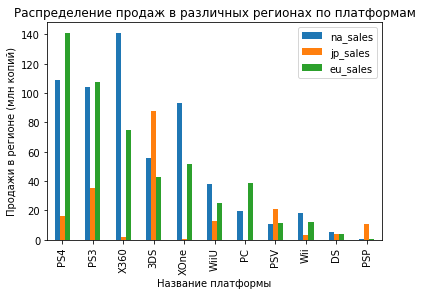

In [55]:
ax = games_actual.groupby('platform').sum().sort_values(ascending=False, by=
                                                       'all_sales').plot(
                                                        kind='bar', y=['na_sales', 'jp_sales', 'eu_sales'])
plt.xlabel('Название платформы')
plt.ylabel('Продажи в регионе (млн копий)')
plt.title('Распределение продаж в различных регионах по платформам')

Итак, что мы видим. В Северной Америке лидирует по продажам X360, в Японии - 3DS, в Европе - PS4, везде разный лидер. А теперь подробнее: X360 является лидером в Северной Америке, в Европе эта платформа на третьем месте, а в Японии даже не входит в топ-5. Японский лидер 3DS является пятым в Европе и в Северной Америке. А лидер по Европе PS4 на втором месте в Северной Америке и лишь на четвертом в Японии. Содержимое топ-5 для Европы и Северной Америки аналогично, даже платформы на 4 и 5 местах в этих рейтингах одинаковы, такого сходства у данных регионов нет с Японией: азиатский топ не содержит двух лидеров Европейско-Америнского топа, а также имеет в своем списке две платформы, которые не пользуются спросом в других странах. Вывод: вкусы в Европе и Северной Америке схожи между собой, но имеют мало общего с Японией.

А теперь к жанрам. Выделим топ-5.

In [56]:
for i in ['na', 'jp', 'eu']:
    print('Самые продаваемы жанры в регионе ' + i)
    name_col = i + '_sales'
    print(games_actual.groupby('genre')[name_col].sum().sort_values(ascending=False).head())

Самые продаваемы жанры в регионе na
genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
Самые продаваемы жанры в регионе jp
genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64
Самые продаваемы жанры в регионе eu
genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64


График для всех регионов.

Text(0.5, 1.0, 'Распределение продаж в различных регионах по жанрам')

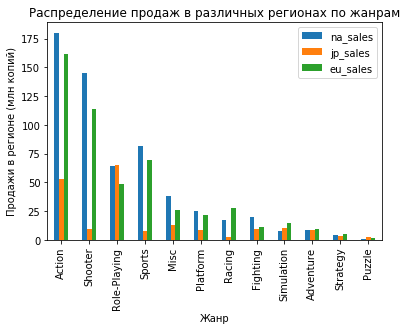

In [57]:
ax = games_actual.groupby('genre').sum().sort_values(ascending=False, by=
                                                       'all_sales').plot(
                                                        kind='bar', y=['na_sales', 'jp_sales', 'eu_sales'])
plt.xlabel('Жанр')
plt.ylabel('Продажи в регионе (млн копий)')
plt.title('Распределение продаж в различных регионах по жанрам')

Что мы получили? Топ-5 для Европы и Северной Америки практически идентичны - не совпадают только жанры, занимающие последние места. Опять выделяется Япония - топ данного региона содержит в себе Action и Role_Playing (лидер), которые есть и в рейтинге Северной Америки, и Европы, содержит Misc, который также пользуется спросом в Северной Америке, и два оставшихся жанра - Simulation и Fighting - интерсуют потребителя только в Азии. Вывод: вкусы в Северной Америке и Европе почти совпадают, но имеют они мало схожего с предпочтениями жителей Японии.

Посмотрим, наконец, как влияет на продажи рейтинг.

Text(0.5, 1.0, 'Распределение продаж в различных регионах по рейтингам')

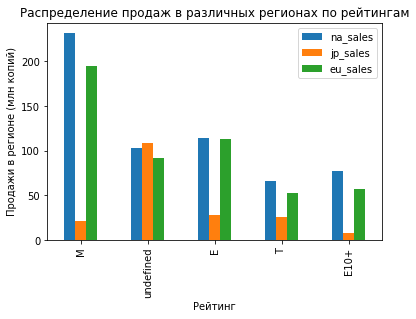

In [58]:
ax = games_actual.groupby('rating').sum().sort_values(ascending=False, by=
                                                       'all_sales').plot(
                                                        kind='bar', y=['na_sales', 'jp_sales', 'eu_sales'])
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в регионе (млн копий)')
plt.title('Распределение продаж в различных регионах по рейтингам')

Итак, получаем уже ожидаемый вывод: распределения продаж по рейтингу для Америки и Европе аналогичны: наибольшим спросом пользуются игры с рейтингом M (от слова 'Mature'), на втором месте E (от 'Everyone'), отличительная особенность данных регионов заключается в том, что рейтинг сильно влияет на продажи - это заметно по графику, между столбцами ощутимая разница. В Японии же положение другое: во-первых, здесь рейтинг уже не так сильно влияет на продажи - продажи каждого рейтинга отличаются друг от друга не так сильно, если говорить об определенных категориях (все столбцы, кроме undefined), как в других регионах, но если постараться и выделить пару лидеров, то это будут E (первое место) и T (от 'Teens') на втором, M же занимает всего третье место, во-вторых, среди всех категорий здесь есть яркий лидер - undefined - неопределенный жанр. И как итог -  в очередной раз распределение по Японии отличается от распределений по Европе и Америке. 

**Вывод по Шагу 4**: на данном Шаге мы построили портреты пользователя каждого из трех регионов, информацию о которых мы имеем, мы выяснили, что вкусы пользователей Европы и Северной Америки сильно схожи, в это время портрет потребителя из Японии отличается от других двух.

<h3>Шаг 5: Проверка гипотез</h3>
<a id='hypo'></a>

Здесь нам требуется проверить две гипотезы. Первая: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Вторая: средние пользовательские рейтинги жанров Action и Sports разные.

Начнем с первой. Нам нужно проверить, равны ли средние пользовательские рейтинги платформ Xbox One и PC. Будем проверять данную гипотезу как гипотезу о равенстве средних двух генеральных совокупностей, где генеральные совокупности это собрания всех пользовательских рейтингов для всех игр на Xbox One и на PC. А срезы нашего датасета - пользовательские рейтинги для каждой из этих двух платформ - будем рассматривать как выборки из этих совокупностей. 

Сформулируем нулевую гипотезу: средние этих двух генеральных совокупностей равны. Сформулируем и альтернативную: средние этих двух генеральных совокупностей различаются. 

Критический уровень статистической значимости возьмем 0.05.

Оснований считать дисперсии совокупностей разными у нас нет, будем считать, что они одинаковы. Но перед этим проверим это с помощью теста Левене.

In [59]:
st.levene(games_actual[games_actual['user_score'].notna()].query('platform == "XOne"')['user_score'], 
          games_actual[games_actual['user_score'].notna()].query('platform == "PC"')['user_score']).pvalue

0.014264583982264795

P-value результата теста низок, поэтому придется принять дисперсии разными.

Проведем t-test и посмотрим на p-value, сравним его с критическим уровнем статистической значимости. 

In [60]:
results = st.ttest_ind(games_actual[games_actual['user_score'].notna()].query('platform == "XOne"')['user_score'], 
                      games_actual[games_actual['user_score'].notna()].query('platform == "PC"')['user_score'], 
                      equal_var=False)
alpha = .05
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается -> Средние не равны')
else: 
    print('Нулевая гипотеза не отвергается')

Нулевая гипотеза не отвергается


In [61]:
results.pvalue

0.6206366351489678

Получаем, что уровень статистической значимости результата выше критического уровня статистической значимости. Это значит, что, при принятии нулевой гипотезы верной, вероятность иметь те выборки, что мы имеем, не мала -> нулевая гипотеза может быть принята. Отсюда вывод: средние совокупностей равны, значит, средние пользовательские рейтинги платформ Xbox One и PC равны. 

Проверим вторую гипотезу.

Нам нужно проверить, разные ли средние пользовательские рейтинги жанров Action и Sports. По аналогии с предыдущей гипотезой, будем проверять данную гипотезу как гипотезу о равенстве средних двух генеральных совокупностей, где генеральные совокупности это собрания всех пользовательских рейтингов для всех игр жанра Action и Sports. А срезы нашего датасета - пользовательские рейтинги для каждого из этих двух жанров - будем рассматривать как выборки из этих совокупностей. 

Сформулируем нулевую гипотезу: средние наших ген. совокупностей равны, альтернативная: средние генеральных совокупностей не равны. 

Проведем тест, чтобы проверить равенство дисперсий выборок.

In [62]:
st.levene(games_actual[games_actual['user_score'].notna()].query('genre == "Action"')['user_score'], 
          games_actual[games_actual['user_score'].notna()].query('genre == "Sports"')['user_score']).pvalue

1.8018286275085335e-05

Как видно, мы не можем считать дисперсии равными.

Критический уровень статистической значимости тот же. Проведем тест.

In [63]:
results = st.ttest_ind(games_actual[games_actual['user_score'].notna()].query('genre == "Action"')['user_score'], 
                      games_actual[games_actual['user_score'].notna()].query('genre == "Sports"')['user_score'],
                      equal_var=False)
alpha = .05
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается -> Средние не равны')
else: 
    print('Нулевая гипотеза не отвергается')

Нулевая гипотеза отвергается -> Средние не равны


In [64]:
results.pvalue

2.337200239591976e-20

Получаем, что уровень статистической значимости результата ниже критического уровня статистической значимости. Это значит, что, при принятии нулевой гипотезы верной, вероятность иметь те выборки, что мы имеем, мала -> нулевая гипотеза не может быть принята. Отсюда вывод: средние совокупностей не равны, значит, средние пользовательские рейтинги игр жанров Action и Sports разные.  

**Вывод по Шагу 5**: на данном Шаге мы проверили две гипотезы как гипотезы о равенстве средних двух генеральных совокупностей, получили результат: средние пользовательские рейтинги платформ Xbox One и PC одинаковы, а вот средние пользовательские рейтинги игр жанров Action и Sports - нет.

<h3>Шаг 6: Общий вывод</h3>
<a id='conq'></a>

Настало время заключительного этапа - сделать общие выводы.

Изначально наша задача стояла в том, чтобы найти определяющие успешность игры закономерности. Поэтому резюмируем все, что мы выяснили, исследуя данные за крайние пять лет. 

Во-первых, успешность игры зависит от того, для какой платформы она предназначена. Есть в данном вопросе абсолютные лидеры - потенциально прибыльные платформы, такие как XOne и PS4, но все не так просто. Составляя портреты, мы выяснили, что в Японии особой популярностью пользуется платформа 3DS, которую мы, в свою очередь, занесли в список потенциально прибыльных. Так, связка платформа + регион являются фактором, определяющим успешность игры. Без привязки к региону использовать данный фактор может быть рискованно. 

Во-вторых, успешность игры зависит от жанра. Так, мы заметили, что игры жанра Shooter выпускаются не так часто (относительно), зато спрос на них - высокий, и абсолютно противоположная ситуация для Adventure. Но опять же - стоит оглядываться на регион, вкусы японцев отличаются от европейских и американцев. 

В-третьих, успех игры определяется еще и рейтингом. Это не такой ключевой момент, как платформа или жанр, но имеет вес. Так, рейтинг E может сослужить хорошим вариантом для целевого выбора, а вот при раздумьях о том, стоит ли приобретать много игр жанра M стоит обратить внимание на то, для какого региона это предназначено: большой спрос будет в Европе и Америке, а вот в Японии на рейтинг особо внимания никто и не обратит -  все берут плюс-минус одинаково.

В-четвертых, стоит обратить внимание на отзывы критиков, но не пользователей. Лишь профессионалы своего дела помогут в данном вопросе - как мы выяснили, отзывы именно критиков хорошо коррелируют с продажами. 

**Вывод по Шагу 6**: итак, мы выяснили, что же влияет на успешность игры, а также установили, что применять эти параметры лучше с оглядкой на то, для какого региона предназначены игры. 